# LAB 06: Small world and scale free networks

August 2nd 2022

* This is a python tutorial on small world and scale free networks.
* There is no marking for this tutorial. You do not need to submit your solution to us, but this exercise will help you to start working on your project
* In the begining of this tutorial you will find a similar code than used in the class. In the end, there are exercises for you.
* We recommend you to solve this lab until next tuesday (August 9th).

## Watts-Strogatz model

Watts and Strogatz described a process that generates small world graphs: start from a regular ring lattice (with N nodes, each one with degree K), then with probability p rewire each edge. In this tutorial we will

* Create a function that recieves N, K, and returns a regular ring lattice
* Generate a regular lattice with size 10, K=4. Draw the resulting graph.
* Create a function that recieves N, K, and p and returns a Watts-Strogatz graph.
* Generate a graph with size 10, K=4, p=0.3. Draw the resulting graph.
* Generates a sequence of graphs 101 graphs with N=100, K=8, and p varying between 0, and 1 in steps of 0.01.
* Compute the diameter and avergage clustering coefficient of each graph.


[13,
 9,
 7,
 7,
 6,
 7,
 6,
 7,
 6,
 5,
 6,
 5,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

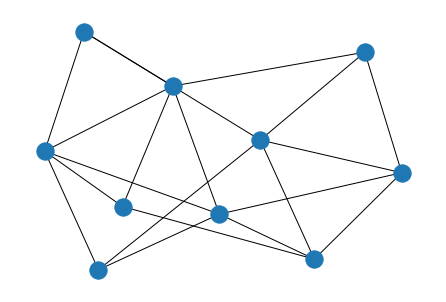

In [1]:
import networkx as nx
import random
import matplotlib.pyplot as plt

random.seed(0)

def regular_ring_lattice(N, K):
    nodes = range(N)
    G = nx.Graph()
    for i in nodes:
        for j in range(int(K/2)):
            G.add_edge(i, (i + j + 1) % N)
            G.add_edge(i, (i-j-1) % N)
    return G

G = regular_ring_lattice(10, 4)
nx.draw(G)

def WS(N, K, p):
    G = regular_ring_lattice(N, K)
    for node in G.nodes:
        for j in range(int(K/2)):
            x = random.random()
            if (x <= p):
                nodes = [i for i in G.nodes if i != node 
                         and not G.has_edge(node, i)]
                old_edge = (node + j + 1) % N
                G.remove_edge(node, old_edge)
                new_edge = random.sample(nodes, 1)[0]
                G.add_edge(node, new_edge)
    return G

%matplotlib inline
G = WS(10, 4, 1)

nx.draw(G)

N = 100
K = 8
ps = [x*0.01 for x in range(101)]
graphs = [nx.watts_strogatz_graph(N, K, p) for p in ps]

avg_clust = [nx.average_clustering(G) for G in graphs]
avg_clust

diameters = [nx.diameter(G) for G in graphs]
diameters




## Scale-free networks

* Load the library powerlaw (https://doi.org/10.1371/journal.pone.0085777)
* Download data from http://networksciencebook.com/translations/en/resources/networks.zip
* Load the network protein.edgelist.txt
* Compute the average clustering coefficient
* Plot histogram of the degrees
* Fit the parameters of a power law degree distribution
* Which distribution has a better fit? Power law or exponential?
* Compare theoretical power law distribution with the empirical distribution

In [2]:
pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!wget http://networksciencebook.com/translations/en/resources/networks.zip
!unzip networks.zip

--2022-08-02 18:19:05--  http://networksciencebook.com/translations/en/resources/networks.zip
Resolving networksciencebook.com (networksciencebook.com)... 166.62.76.227
Connecting to networksciencebook.com (networksciencebook.com)|166.62.76.227|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 141043055 (135M) [application/zip]
Saving to: ‘networks.zip’

networks.zip        100%[===================>] 134.51M  39.9MB/s    in 4.7s    

2022-08-02 18:19:10 (28.8 MB/s) - ‘networks.zip’ saved [141043055/141043055]

Archive:  networks.zip
  inflating: actor.edgelist.txt      
  inflating: citation.edgelist.txt   
  inflating: collaboration.edgelist.txt  
  inflating: email.edgelist.txt      
  inflating: internet.edgelist.txt   
  inflating: metabolic.edgelist.txt  
  inflating: phonecalls.edgelist.txt  
  inflating: powergrid.edgelist.txt  
  inflating: protein.edgelist.txt    
  inflating: www.edgelist.txt        


Calculating best minimal value for power law fit
2.83212280641244
None
0.023572668000292618


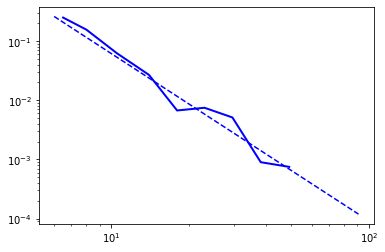

6.0


In [6]:
import powerlaw
import numpy as np

G = nx.read_edgelist("protein.edgelist.txt")
degrees = (np.array(G.degree())[:,1]).astype(int)

plt.hist(degrees, 50)

fit = powerlaw.Fit(degrees, discrete=True)

print(fit.alpha)

print(fit.xmin)

print(fit.D)

res = fit.distribution_compare('power_law', 'exponential')
res

%matplotlib inline

fig1 = fit.plot_pdf(color='b', linewidth=2)
fig2 = fit.power_law.plot_pdf(color='b', linestyle='--', ax=fig1)

plt.show()




## Exercise 

* Load the network you use in your project (if not available yet, use the same network shown in the tutorial)
* Fit the power law distribution to your network. What is the resulting alpha?
* Compare the estimated degree distribution with the power law distribution 
* Do a bootstrap procedure to test the goodness of fit (tip: check the function numpy.random.choice to generate the bootstrap samples, and powerlaw.power_law_ks_distance to compute the Kormogorov-Smirnov distance). For more details, see "Advanced Topics 4.C" in Barabasi's book. 

In [ ]:

# Solution for the last item, given a network G and a 'fit' object (fitting to 
# the power law distribution)

import scipy

n = G.number_of_nodes()

# Power law degree distribution with fitted parameters 

zeta = scipy.special.zeta(fit.alpha, fit.xmin)

boot_size = len(np.where(degrees >= fit.xmin)[0])

p = [(k**(-fit.alpha))/zeta for k in range(fit.xmin.astype(int), n)]

p = p/sum(p) # making sure it sums 1.

# Compute the Kolmogorov-Smirnov distance with the original data

D_orig = fit.D

# Bootstrap procedure

M = 1000

D_boot = []

for i in range(M):
    # Gerate M random bootstrap samples according to the power law distribution
    boot = np.random.choice(np.array(range(fit.xmin.astype(int),n)), 
                            size=boot_size, p=p)
    # Compute the Kolmogorov-Smirnov distance between the boot sample of degrees and 
    # the power law distribution
    D_boot.append(powerlaw.power_law_ks_distance(boot, xmin=fit.xmin, 
                                                 alpha=fit.alpha, 
                                                 discrete=True))

# Plot the distribution of the Kolmogorov-Smirnov distance for the bootstrap samples    
plt.hist(D_boot)
# Indicate the Kolmogorov-Smirnov distance obtained by the original data
plt.axvline(D_orig, color='k', linestyle='dashed', linewidth=1)

# Compute the p-value of the goodness-of-fit test
pvalue = sum(D_boot >= D_orig)/M

if pvalue < 0.05:
    print('The degrees are unlikely to follow a power law distribution')
else:
    print('We do not reject the power law distribution hypothesis')